In [1]:

import math, scipy
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:

df1=pd.read_excel('./UN.xlsx', sheet_name="Table 6")
df1.head(10)

Unnamed: 0 Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN   
5        NaN        NaN        NaN        NaN   
6        NaN        NaN        NaN        NaN   
7        NaN        NaN        NaN        NaN   
8        NaN        NaN        NaN        NaN   
9        NaN        NaN        NaN        NaN   

                                          Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0                                                NaN        NaN        NaN   
1                                                NaN        NaN        NaN   
2                                                NaN        NaN        NaN   
3                                     United Nations        NaN        NaN   
4                                Population Division        NaN        NaN   
5          Department of Economic and Social Affairs        NaN        NaN   
6                                                NaN        NaN        NaN   
7  Trends in International Migrant Stock: The 201...        NaN        NaN   
8  Table 6 - Estimated refugee stock at mid-year ...        NaN        NaN   
9                          POP/DB/MIG/Stock/Rev.2015        NaN        NaN   

  Unnamed: 7 Unnamed: 8  Unnamed: 9  ...  Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0        NaN        NaN         NaN  ...          NaN         NaN         NaN   
1        NaN        NaN         NaN  ...          NaN         NaN         NaN   
2        NaN        NaN         NaN  ...          NaN         NaN         NaN   
3        NaN        NaN         NaN  ...          NaN         NaN         NaN   
4        NaN        NaN         NaN  ...          NaN         NaN         NaN   
5        NaN        NaN         NaN  ...          NaN         NaN         NaN   
6        NaN        NaN         NaN  ...          NaN         NaN         NaN   
7        NaN        NaN         NaN  ...          NaN         NaN         NaN   
8        NaN        NaN         NaN  ...          NaN         NaN         NaN   
9        NaN        NaN         NaN  ...          NaN         NaN         NaN   

  Unnamed: 15 Unnamed: 16  Unnamed: 17  Unnamed: 18 Unnamed: 19 Unnamed: 20  \
0         NaN         NaN          NaN          NaN         NaN         NaN   
1         NaN         NaN          NaN          NaN         NaN         NaN   
2         NaN         NaN          NaN          NaN         NaN         NaN   
3         NaN         NaN          NaN          NaN         NaN         NaN   
4         NaN         NaN          NaN          NaN         NaN         NaN   
5         NaN         NaN          NaN          NaN         NaN         NaN   
6         NaN         NaN          NaN          NaN         NaN         NaN   
7         NaN         NaN          NaN          NaN         NaN         NaN   
8         NaN         NaN          NaN          NaN         NaN         NaN   
9         NaN         NaN          NaN          NaN         NaN         NaN   

  Unnamed: 21  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
5         NaN  
6         NaN  
7         NaN  
8         NaN  
9         NaN  

[10 rows x 22 columns]

In [4]:
#import original messy Table 6 and delete extra rows without data
#Total means sum of female+male data
col_names = ['Sort Order','Major Area, Region, Country or Area of Destination','Notes','Country Code','Type of Data',
             '1990 Estimated refugee stock at mid-year (both sexes)',
             '1995 Estimated refugee stock at mid-year (both sexes)', '2000 Estimated refugee stock at mid-year (both sexes)'
             ,'2005 Estimated refugee stock at mid-year (both sexes)', '2010 Estimated refugee stock at mid-year (both sexes)',
             '2015 Estimated refugee stock at mid-year (both sexes)',
             '1990 Refugees as a percentage of the international migrant stock',
             '1995 Refugees as a percentage of the international migrant stock',
             '2000 Refugees as a percentage of the international migrant stock'
             ,'2005 Refugees as a percentage of the international migrant stock',
             '2010 Refugees as a percentage of the international migrant stock',
             '2015 Refugees as a percentage of the international migrant stock',
             'Annual rate of change of the refugee stock 1990-1995',
             'Annual rate of change of the refugee stock 1995-2000',
             'Annual rate of change of the refugee stock 2000-2005',
             'Annual rate of change of the refugee stock 2005-2010',
             'Annual rate of change of the refugee stock 2010-2015']
df2=pd.read_excel('UN.xlsx', sheet_name= 'Table 6',skiprows=16,header=None,usecols=list(range(1,22)),names=col_names)
df2.head()

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type of Data 1990 Estimated refugee stock at mid-year (both sexes)  \
0          NaN                                           18836571      
1          NaN                                            2014564      
2          NaN                                           16822007      
3          NaN                                            5048391      
4          NaN                                           11773616      

  1995 Estimated refugee stock at mid-year (both sexes)  \
0                                           17853840      
1                                            3609670      
2                                           14244170      
3                                            5160131      
4                                            9084039      

  2000 Estimated refugee stock at mid-year (both sexes)  \
0                                           15827803      
1                                            2997256      
2                                           12830547      
3                                            3047488      
4                                            9783059      

  2005 Estimated refugee stock at mid-year (both sexes)  \
0                                           13276733      
1                                            2361229      
2                                           10915504      
3                                            2363782      
4                                            8551722      

   2010 Estimated refugee stock at mid-year (both sexes)  \
0                                           15370755       
1                                            2046917       
2                                           13323838       
3                                            1957884       
4                                           11365954       

   2015 Estimated refugee stock at mid-year (both sexes)  ...  \
0                                           19577474      ...   
1                                            1954224      ...   
2                                           17623250      ...   
3                                            3443582      ...   
4                                           14179668      ...   

  1995 Refugees as a percentage of the international migrant stock  \
0                                          11.103013                 
1                                           3.910511                 
2                                          20.795958                 
3                                          44.041961                 
4                                          15.999082                 

  2000 Refugees as a percentage of the international migrant stock  \
0                                           9.164736                 
1                                           2.899391                 
2                                          18.507035                 
3                                          30.221557                 
4                                           16.51313                 

  2005 Refugees as a percentage of the international migrant stock  \
0                                           6.941389                 
1                                           2.015025                 
2                                          14.733162                 
3                                           24.08243                 
4                                          13.305391                 

  2010 Refugees as a percentage 

In [5]:
#Make Table for Estimated refugee stock at mid-year

    #Drop 'Annual rate of change of the refugee stock 1990-1995',
             #'Annual rate of change of the refugee stock 1995-2000',
             #'Annual rate of change of the refugee stock 2000-2005',
             #'Annual rate of change of the refugee stock 2005-2010',
             #'Annual rate of change of the refugee stock 2010-2015']
    #Allows us to create a new table later for rate of change   
df2.drop(columns=['Annual rate of change of the refugee stock 1990-1995',
             'Annual rate of change of the refugee stock 1995-2000',
             'Annual rate of change of the refugee stock 2000-2005',
             'Annual rate of change of the refugee stock 2005-2010',
             'Annual rate of change of the refugee stock 2010-2015'],inplace=True)
df2

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                                WORLD   NaN           900   
1                                    Developed regions   (b)           901   
2                                   Developing regions   (c)           902   
3                            Least developed countries   (d)           941   
4    Less developed regions excluding least develop...   NaN           934   
..                                                 ...   ...           ...   
260                                              Samoa   NaN           882   
261                                            Tokelau   NaN           772   
262                                              Tonga   NaN           776   
263                                             Tuvalu   NaN           798   
264                          Wallis and Futuna Islands   NaN           876   

    Type of Data 1990 Estimated refugee stock at mid-year (both sexes)  \
0            NaN                                           18836571      
1            NaN                                            2014564      
2            NaN                                           16822007      
3            NaN                                            5048391      
4            NaN                                           11773616      
..           ...                                                ...      
260            B                                                  0      
261            B                                                  0      
262            B                                                  0      
263            C                                                  0      
264            B                                                  0      

    1995 Estimated refugee stock at mid-year (both sexes)  \
0                                             17853840      
1                                              3609670      
2                                             14244170      
3                                              5160131      
4                                              9084039      
..                                                 ...      
260                                                  0      
261                                                  0      
262                                                  0      
263                                                  0      
264                                                  0      

    2000 Estimated refugee stock at mid-year (both sexes)  \
0                                             15827803      
1                                              2997256      
2                                             12830547      
3                                              3047488      
4                                              9783059      
..                                                 ...      
260                                                  0      
261                                                  0      
262                                                  0      
263                                                  0      
264                                                  0      

    2005 Estimated refugee stock at mid-year (both sexes)  \
0                                             13276733      
1                                              2361229      
2                                             10915504      
3                                              2363782      
4                                              8551722      
..                                                 ...      
260                                                  0      
261                                                  0      
262                                                  0      
263                                                  0      
264                                      

In [6]:
#melt to create new columns with single values

df3=pd.melt(df2,id_vars=['Major Area, Region, Country or Area of Destination',
                         'Notes','Country Code','Type of Data'],
            value_name='Estimated Refugee Stock')
df3.head(5)

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type of Data                                           variable  \
0          NaN  1990 Estimated refugee stock at mid-year (both...   
1          NaN  1990 Estimated refugee stock at mid-year (both...   
2          NaN  1990 Estimated refugee stock at mid-year (both...   
3          NaN  1990 Estimated refugee stock at mid-year (both...   
4          NaN  1990 Estimated refugee stock at mid-year (both...   

  Estimated Refugee Stock  
0                18836571  
1                 2014564  
2                16822007  
3                 5048391  
4                11773616

In [7]:
#make year column
df3['Year'] = df3['variable'].str[0:4]
df3['Year'].head(10)

0    1990
1    1990
2    1990
3    1990
4    1990
5    1990
6    1990
7    1990
8    1990
9    1990
Name: Year, dtype: object

In [8]:
#make combined refugee stock as percentage and estimated refugee stock
df3['comb'] = df3['variable'].str[5:]
df3['comb'].tail(20)

3160    Refugees as a percentage of the international ...
3161    Refugees as a percentage of the international ...
3162    Refugees as a percentage of the international ...
3163    Refugees as a percentage of the international ...
3164    Refugees as a percentage of the international ...
3165    Refugees as a percentage of the international ...
3166    Refugees as a percentage of the international ...
3167    Refugees as a percentage of the international ...
3168    Refugees as a percentage of the international ...
3169    Refugees as a percentage of the international ...
3170    Refugees as a percentage of the international ...
3171    Refugees as a percentage of the international ...
3172    Refugees as a percentage of the international ...
3173    Refugees as a percentage of the international ...
3174    Refugees as a percentage of the international ...
3175    Refugees as a percentage of the international ...
3176    Refugees as a percentage of the international ...
3177    Refuge

In [9]:
#Make "Estimated refugee stock at mid-year (both sexes)"


final_table = pd.pivot(df3,index=['Major Area, Region, Country or Area of Destination','Notes','Country Code',
'Type of Data','Year'],columns='comb',values='Estimated Refugee Stock').reset_index().rename_axis(None,axis=1)

final_table.drop(columns=['Major Area, Region, Country or Area of Destination',
                          'Refugees as a percentage of the international migrant stock'],inplace=True)

final_table.head()

Notes  Country Code Type of Data  Year  \
0   NaN             4            B  1990   
1   NaN             4            B  1995   
2   NaN             4            B  2000   
3   NaN             4            B  2005   
4   NaN             4            B  2010   

  Estimated refugee stock at mid-year (both sexes)  
0                                               25  
1                                            19605  
2                                                0  
3                                               32  
4                                             6434

In [10]:
#make table for Annual rate of change of the refugee stock
df1=pd.read_excel('./UN.xlsx', sheet_name="Table 6")
df1.head(20)

col_names = ['Sort Order','Major Area, Region, Country or Area of Destination','Notes','Country Code','Type of Data',
             '1990 Estimated refugee stock at mid-year (both sexes)',
             '1995 Estimated refugee stock at mid-year (both sexes)', '2000 Estimated refugee stock at mid-year (both sexes)'
             ,'2005 Estimated refugee stock at mid-year (both sexes)', '2010 Estimated refugee stock at mid-year (both sexes)',
             '2015 Estimated refugee stock at mid-year (both sexes)',
             '1990 Refugees as a percentage of the international migrant stock',
             '1995 Refugees as a percentage of the international migrant stock',
             '2000 Refugees as a percentage of the international migrant stock'
             ,'2005 Refugees as a percentage of the international migrant stock',
             '2010 Refugees as a percentage of the international migrant stock',
             '2015 Refugees as a percentage of the international migrant stock',
             '1995',
             '2000',
             '2005',
             '2010',
             '2015']
df7=pd.read_excel('UN.xlsx', sheet_name= 'Table 6',skiprows=16,header=None,usecols=list(range(1,22)),names=col_names)
df7.head(5
        )

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type of Data 1990 Estimated refugee stock at mid-year (both sexes)  \
0          NaN                                           18836571      
1          NaN                                            2014564      
2          NaN                                           16822007      
3          NaN                                            5048391      
4          NaN                                           11773616      

  1995 Estimated refugee stock at mid-year (both sexes)  \
0                                           17853840      
1                                            3609670      
2                                           14244170      
3                                            5160131      
4                                            9084039      

  2000 Estimated refugee stock at mid-year (both sexes)  \
0                                           15827803      
1                                            2997256      
2                                           12830547      
3                                            3047488      
4                                            9783059      

  2005 Estimated refugee stock at mid-year (both sexes)  \
0                                           13276733      
1                                            2361229      
2                                           10915504      
3                                            2363782      
4                                            8551722      

   2010 Estimated refugee stock at mid-year (both sexes)  \
0                                           15370755       
1                                            2046917       
2                                           13323838       
3                                            1957884       
4                                           11365954       

   2015 Estimated refugee stock at mid-year (both sexes)  ...  \
0                                           19577474      ...   
1                                            1954224      ...   
2                                           17623250      ...   
3                                            3443582      ...   
4                                           14179668      ...   

  1995 Refugees as a percentage of the international migrant stock  \
0                                          11.103013                 
1                                           3.910511                 
2                                          20.795958                 
3                                          44.041961                 
4                                          15.999082                 

  2000 Refugees as a percentage of the international migrant stock  \
0                                           9.164736                 
1                                           2.899391                 
2                                          18.507035                 
3                                          30.221557                 
4                                           16.51313                 

  2005 Refugees as a percentage of the international migrant stock  \
0                                           6.941389                 
1                                           2.015025                 
2                                          14.733162                 
3                                           24.08243                 
4                                          13.305391                 

  2010 Refugees as a percentage 

In [11]:
#drop all columns except annual rate of change of the refugee stock column 
df7.drop(columns=['1990 Estimated refugee stock at mid-year (both sexes)',
             '1995 Estimated refugee stock at mid-year (both sexes)', '2000 Estimated refugee stock at mid-year (both sexes)'
             ,'2005 Estimated refugee stock at mid-year (both sexes)', '2010 Estimated refugee stock at mid-year (both sexes)',
             '2015 Estimated refugee stock at mid-year (both sexes)',
             '1990 Refugees as a percentage of the international migrant stock',
             '1995 Refugees as a percentage of the international migrant stock',
             '2000 Refugees as a percentage of the international migrant stock'
             ,'2005 Refugees as a percentage of the international migrant stock',
             '2010 Refugees as a percentage of the international migrant stock',
             '2015 Refugees as a percentage of the international migrant stock',],inplace=True)
df7

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                                WORLD   NaN           900   
1                                    Developed regions   (b)           901   
2                                   Developing regions   (c)           902   
3                            Least developed countries   (d)           941   
4    Less developed regions excluding least develop...   NaN           934   
..                                                 ...   ...           ...   
260                                              Samoa   NaN           882   
261                                            Tokelau   NaN           772   
262                                              Tonga   NaN           776   
263                                             Tuvalu   NaN           798   
264                          Wallis and Futuna Islands   NaN           876   

    Type of Data      1995      2000      2005      2010      2015  
0            NaN -2.123497 -3.837069 -5.557223 -0.025089  2.947267  
1            NaN  9.388424 -5.983348 -7.277379 -5.323293 -2.087656  
2            NaN -2.839417 -2.332154    -4.561  0.285195  2.663652  
3            NaN -0.680327 -7.531747 -4.541459 -4.187109  7.766031  
4            NaN   -4.3836  0.632489 -4.319731  1.530456  1.571047  
..           ...       ...       ...       ...       ...       ...  
260            B        ..        ..        ..        ..        ..  
261            B        ..        ..        ..        ..        ..  
262            B        ..        ..        ..        ..        ..  
263            C        ..        ..        ..        ..        ..  
264            B        ..        ..        ..        ..        ..  

[265 rows x 9 columns]

In [12]:
#make column for year range and and rate of change of refugee stock
df8=pd.melt(df7,id_vars=['Major Area, Region, Country or Area of Destination',
                         'Notes','Country Code','Type of Data'],
            value_name='Annual rate of change of the refugee stock',var_name='Year')
df8.drop(columns=['Major Area, Region, Country or Area of Destination'],inplace=True)

df8.head(5
        )



Notes  Country Code Type of Data  Year  \
0   NaN           900          NaN  1995   
1   (b)           901          NaN  1995   
2   (c)           902          NaN  1995   
3   (d)           941          NaN  1995   
4   NaN           934          NaN  1995   

  Annual rate of change of the refugee stock  
0                                  -2.123497  
1                                   9.388424  
2                                  -2.839417  
3                                  -0.680327  
4                                    -4.3836

In [13]:
#delete nan values
df8=df8[df8['Annual rate of change of the refugee stock']!='..']

In [14]:
#sory year 
df8=df8.sort_values(by=['Country Code','Year'])

In [15]:
#select data by development
df_by_development =df8[df8['Country Code'].isin([901,902])]

In [16]:
df_by_development

Notes  Country Code Type of Data  Year  \
1      (b)           901          NaN  1995   
266    (b)           901          NaN  2000   
531    (b)           901          NaN  2005   
796    (b)           901          NaN  2010   
1061   (b)           901          NaN  2015   
2      (c)           902          NaN  1995   
267    (c)           902          NaN  2000   
532    (c)           902          NaN  2005   
797    (c)           902          NaN  2010   
1062   (c)           902          NaN  2015   

     Annual rate of change of the refugee stock  
1                                      9.388424  
266                                   -5.983348  
531                                   -7.277379  
796                                   -5.323293  
1061                                  -2.087656  
2                                     -2.839417  
267                                   -2.332154  
532                                      -4.561  
797                                    0.285195  
1062                                   2.663652

In [17]:
x

NameError: name 'x' is not defined

In [ ]:
y1

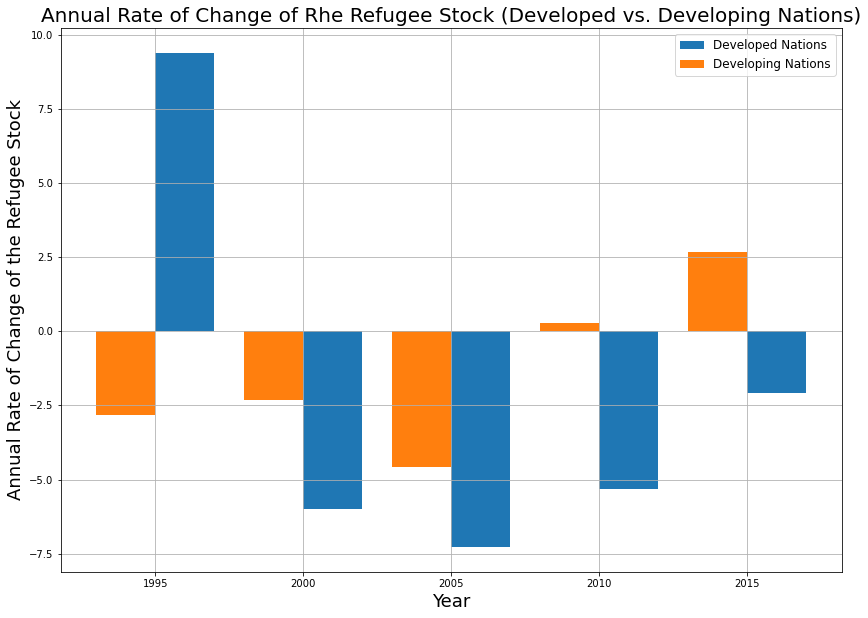

In [24]:
#select developed vs developing graph
# create a figure and axis
fig, ax = plt.subplots()

# scatter male against female
x = df_by_development['Year'][:5].astype(int)
y1 = df_by_development[df_by_development['Country Code']==901]['Annual rate of change of the refugee stock'].values
y2 = df_by_development[df_by_development['Country Code']==902]['Annual rate of change of the refugee stock'].values
w = 1
rects1 = ax.bar(x+w, y1, width = 2, color='tab:blue', align='center')
rects2 = ax.bar(x-w, y2,  width = 2, color='tab:orange', align='center')

fig.set_size_inches(14, 10)

#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
ax.grid(True)
ax.set_title('Annual Rate of Change of Rhe Refugee Stock (Developed vs. Developing Nations)', fontsize=20)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Annual Rate of Change of the Refugee Stock', fontsize=18)
ax.legend( (rects1[0], rects2[0]), ('Developed Nations', 'Developing Nations'), fontsize=12 )

In [19]:
#select by continent
df_by_region =df8[df8['Country Code'].isin([903,935,908,909,904, 905])]

In [20]:
df_by_region 

Notes  Country Code Type of Data  Year  \
6      NaN           903          NaN  1995   
271    NaN           903          NaN  2000   
536    NaN           903          NaN  2005   
801    NaN           903          NaN  2010   
1066   NaN           903          NaN  2015   
179    NaN           904          NaN  1995   
444    NaN           904          NaN  2000   
709    NaN           904          NaN  2005   
974    NaN           904          NaN  2010   
1239   NaN           904          NaN  2015   
231    NaN           905          NaN  1995   
496    NaN           905          NaN  2000   
761    NaN           905          NaN  2005   
1026   NaN           905          NaN  2010   
1291   NaN           905          NaN  2015   
126    NaN           908          NaN  1995   
391    NaN           908          NaN  2000   
656    NaN           908          NaN  2005   
921    NaN           908          NaN  2010   
1186   NaN           908          NaN  2015   
237    NaN           909          NaN  1995   
502    NaN           909          NaN  2000   
767    NaN           909          NaN  2005   
1032   NaN           909          NaN  2010   
1297   NaN           909          NaN  2015   
70     NaN           935          NaN  1995   
335    NaN           935          NaN  2000   
600    NaN           935          NaN  2005   
865    NaN           935          NaN  2010   
1130   NaN           935          NaN  2015   

     Annual rate of change of the refugee stock  
6                                      0.076037  
271                                   -8.003244  
536                                   -5.953976  
801                                   -4.672588  
1066                                   6.133656  
179                                  -23.096408  
444                                  -41.213183  
709                                    -0.53924  
974                                    38.89392  
1239                                  -1.847228  
231                                    1.917003  
496                                   -7.863684  
761                                   -6.037203  
1026                                  -6.472904  
1291                                  -1.526424  
126                                     13.2017  
391                                   -4.942878  
656                                   -7.804308  
921                                   -4.517854  
1186                                  -2.427125  
237                                   -4.615626  
502                                   -3.690775  
767                                   -2.334459  
1032                                 -21.867535  
1297                                   7.804057  
70                                    -3.819461  
335                                    1.732425  
600                                     -4.0395  
865                                     1.00574  
1130                                   1.933203

In [21]:
#sory continent vals
df_by_region=df_by_region.sort_values(by=['Country Code','Year'])

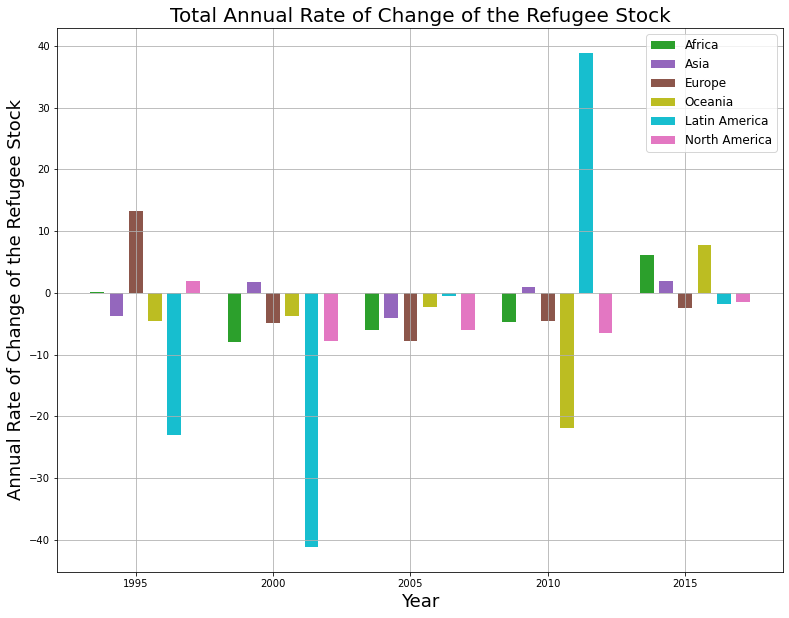

In [23]:
#create continent graph
# create a figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# scatter male against female
x = df_by_region['Year'][:5].astype(int)
#903,935,908,909,904, 905
y_africa = df_by_region[df_by_region['Country Code']==903]['Annual rate of change of the refugee stock'].values
y_asia = df_by_region[df_by_region['Country Code']==935]['Annual rate of change of the refugee stock'].values
y_europe = df_by_region[df_by_region['Country Code']==908]['Annual rate of change of the refugee stock'].values
y_oceanian = df_by_region[df_by_region['Country Code']==909]['Annual rate of change of the refugee stock'].values
y_latin = df_by_region[df_by_region['Country Code']==904]['Annual rate of change of the refugee stock'].values
y_north_america = df_by_region[df_by_region['Country Code']==905]['Annual rate of change of the refugee stock'].values
w = 0.7
rects1 = ax.bar(x-2*w, y_africa, width = 0.5, color='tab:green', align='center')
rects2 = ax.bar(x-w, y_asia,  width = 0.5, color='tab:purple', align='center')
rects3 = ax.bar(x, y_europe, width = 0.5, color='tab:brown', align='center')
rects4 = ax.bar(x+1*w, y_oceanian,  width = 0.5, color='tab:olive', align='center')
rects5 = ax.bar(x+2*w, y_latin, width = 0.5, color='tab:cyan', align='center')
rects6 = ax.bar(x+3*w, y_north_america,  width = 0.5, color='tab:pink', align='center')

#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
fig.set_size_inches(13, 10)
ax.grid(True)
ax.set_title('Total Annual Rate of Change of the Refugee Stock', fontsize=20)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Annual Rate of Change of the Refugee Stock', fontsize=18)
ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]),
          ('Africa', 'Asia','Europe','Oceania', 'Latin America', 'North America'), fontsize=12 )